# Problem Statement: Concrete Strength Prediction

## Objective

To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score

In [82]:
df = pd.read_csv("concrete.csv")
df.shape

(1030, 9)

In [3]:
df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

## Name: Cement

Meaning: amount of cement in kilograms for the mixture of a cubic meter of concrete

Data Type: float (quantitative)

Based on the 50% and the mean their values are pretty close so we can say that the data is somewhat symmetrical, a bit positively skewed. We see some outerliers in the max and min.

There are no missing values

The outliers are every datapoint below 125 and above 500

425.0    20
362.6    20
251.4    15
446.0    14
310.0    14
         ..
312.9     1
261.9     1
325.6     1
143.8     1
145.4     1
Name: cement, Length: 278, dtype: int64

425.0    0.019417
362.6    0.019417
251.4    0.014563
446.0    0.013592
310.0    0.013592
475.0    0.012621
331.0    0.012621
250.0    0.012621
387.0    0.011650
349.0    0.011650
Name: cement, dtype: float64

cement    0
dtype: int64

         count        mean         std    min      25%    50%    75%    max
cement  1030.0  281.167864  104.506364  102.0  192.375  272.9  350.0  540.0

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf5bd6ed0>]]


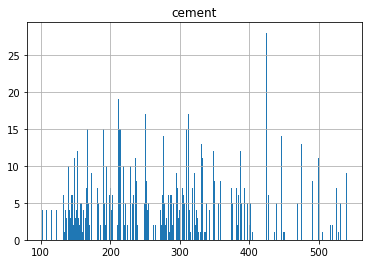

In [7]:
print(df['cement'].value_counts())
print()
print(df['cement'].value_counts(normalize=True).head(10))
print()
print(df[['cement']].isna().sum())
print()
print(df[['cement']].describe().T)
print()
print(df[['cement']].hist(stacked=False, bins=400))

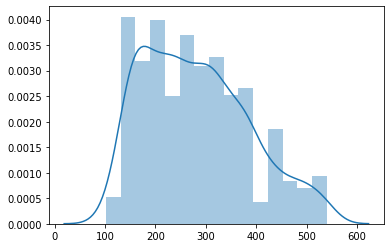

In [8]:
sns.distplot(df[['cement']]);

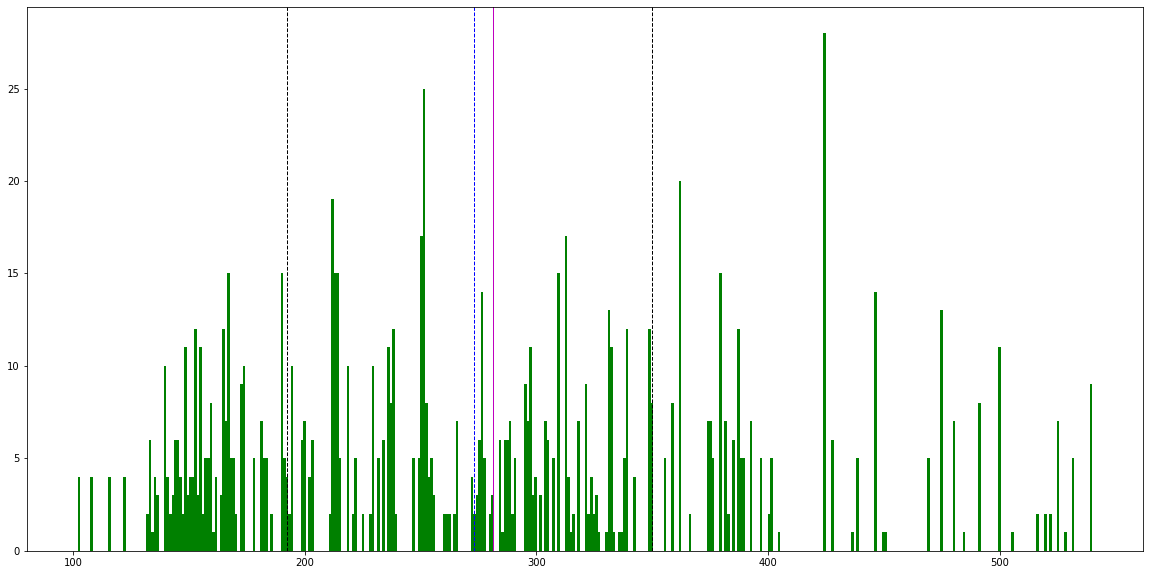

In [9]:
plt.figure(figsize=(20,10))
plt.hist(df['cement'], color='g', bins=400)
plt.axvline(df['cement'].mean(), color='m', linewidth=1)
plt.axvline(df['cement'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['cement'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['cement'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);

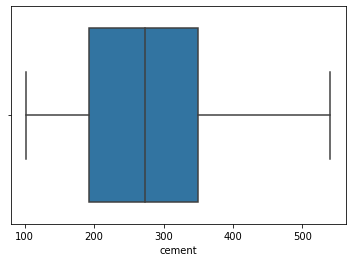

In [10]:
sns.boxplot(df["cement"]);

## Name: Slag

Meaning: amount of slag in kilograms for the mixture of a cubic meter of concrete

Data Type: float (quantitative)

About 46% of the cement mixtures do not have slag

The slag is positive skewed.

There are no missing values

We can see some outerliers around 350

0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64

0.0      0.457282
189.0    0.029126
106.3    0.019417
24.0     0.013592
20.0     0.011650
Name: slag, dtype: float64

slag    0
dtype: int64

       count       mean        std  min  25%   50%     75%    max
slag  1030.0  73.895825  86.279342  0.0  0.0  22.0  142.95  359.4



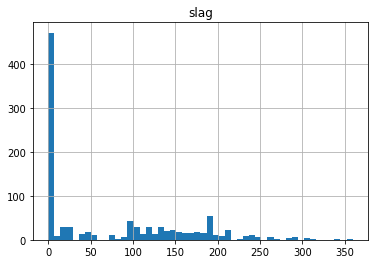

In [11]:
print(df['slag'].value_counts())
print()
print(df['slag'].value_counts(normalize=True).head(5))
print()
print(df[['slag']].isna().sum())
print()
print(df[['slag']].describe().T)
print()
df[['slag']].hist(stacked=False, bins=50);

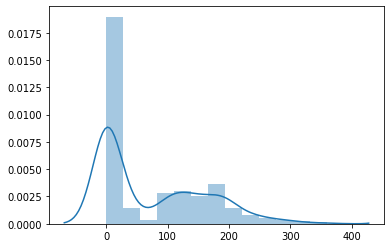

In [12]:
sns.distplot(df[['slag']]);

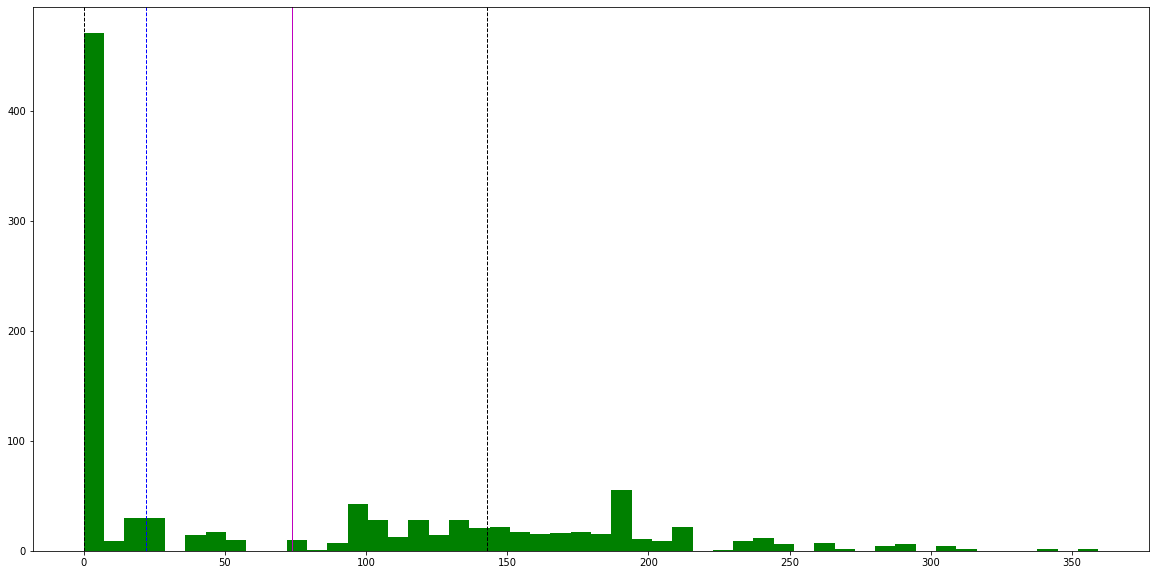

In [13]:
plt.figure(figsize=(20,10))
plt.hist(df['slag'], color='g', bins=50)
plt.axvline(df['slag'].mean(), color='m', linewidth=1)
plt.axvline(df['slag'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['slag'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['slag'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);

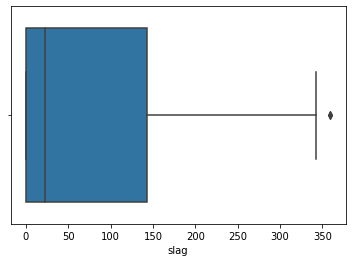

In [14]:
sns.boxplot(df["slag"]);

## Name: Ash

Meaning: amount of ash in kilograms for the mixture of a cubic meter of concrete

Data Type: float (quantitative)

55% of the mixtures do not have ash.

The ash is positively skewed.

There are no missing values

Theres some outliers after 350.

0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
119.0      1
134.0      1
95.0       1
130.0      1
129.7      1
Name: ash, Length: 156, dtype: int64

0.0      0.549515
118.3    0.019417
141.0    0.015534
24.5     0.014563
79.0     0.013592
94.0     0.012621
100.4    0.010680
100.5    0.009709
98.8     0.009709
174.2    0.009709
Name: ash, dtype: float64

ash    0
dtype: int64

      count      mean        std  min  25%  50%    75%    max
ash  1030.0  54.18835  63.997004  0.0  0.0  0.0  118.3  200.1

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf7111550>]]


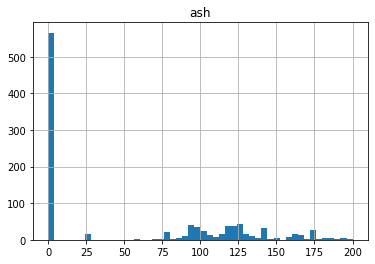

In [15]:
print(df['ash'].value_counts())
print()
print(df['ash'].value_counts(normalize=True).head(10))
print()
print(df[['ash']].isna().sum())
print()
print(df[['ash']].describe().T)
print()
print(df[['ash']].hist(stacked=False, bins=50))

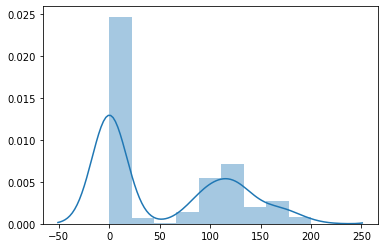

In [16]:
sns.distplot(df[['ash']]);

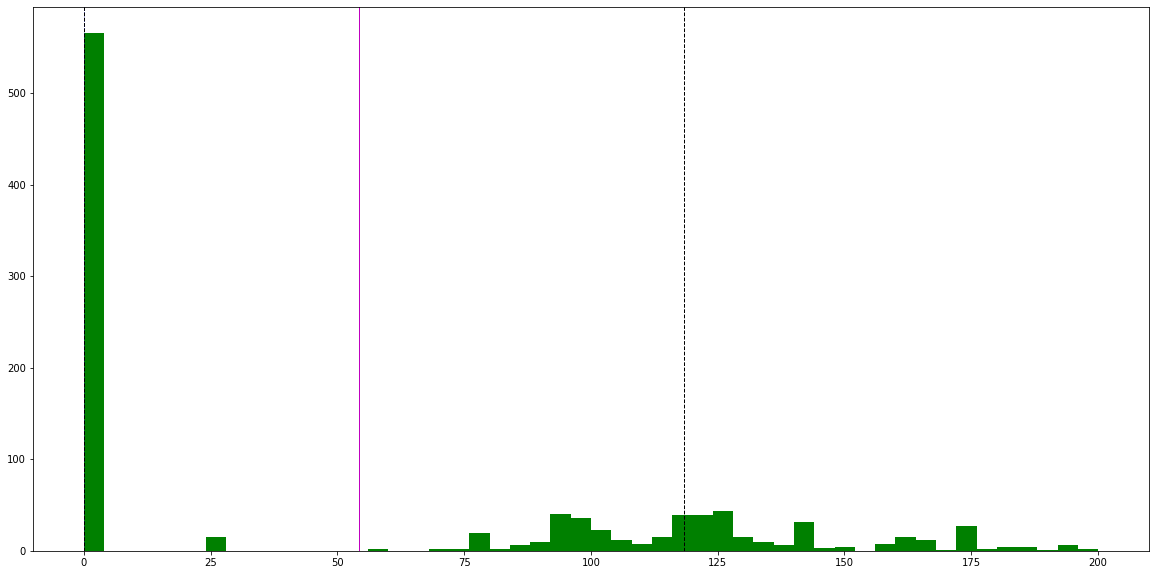

In [17]:
plt.figure(figsize=(20,10))
plt.hist(df['ash'], color='g', bins=50)
plt.axvline(df['ash'].mean(), color='m', linewidth=1)
plt.axvline(df['ash'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['ash'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['ash'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);

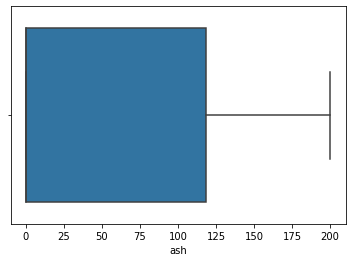

In [18]:
sns.boxplot(df["ash"]);

## Name: Water

Meaning: amount of water in kilograms for the mixture of a cubic meter of concrete

Data Type: float (quantitative)

The water is a bit negatively skewed

There are no missing values

Theres some outliers below 130 and after 230.

192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
165.0      1
237.0      1
166.7      1
191.3      1
184.4      1
Name: water, Length: 195, dtype: int64

192.0    0.114563
228.0    0.052427
185.7    0.044660
203.5    0.034951
186.0    0.027184
162.0    0.019417
164.9    0.019417
153.5    0.014563
185.0    0.014563
178.0    0.013592
Name: water, dtype: float64

water    0
dtype: int64

        count        mean        std    min    25%    50%    75%    max
water  1030.0  181.567282  21.354219  121.8  164.9  185.0  192.0  247.0

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf5b42e90>]]


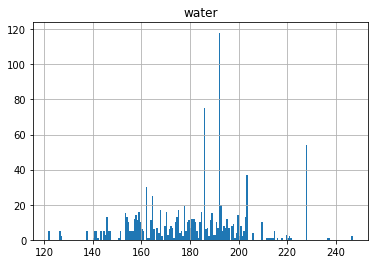

In [19]:
print(df['water'].value_counts())
print()
print(df['water'].value_counts(normalize=True).head(10))
print()
print(df[['water']].isna().sum())
print()
print(df[['water']].describe().T)
print()
print(df[['water']].hist(stacked=False, bins=200))

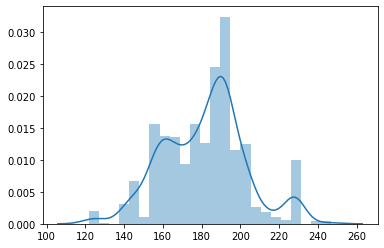

In [20]:
sns.distplot(df[['water']]);

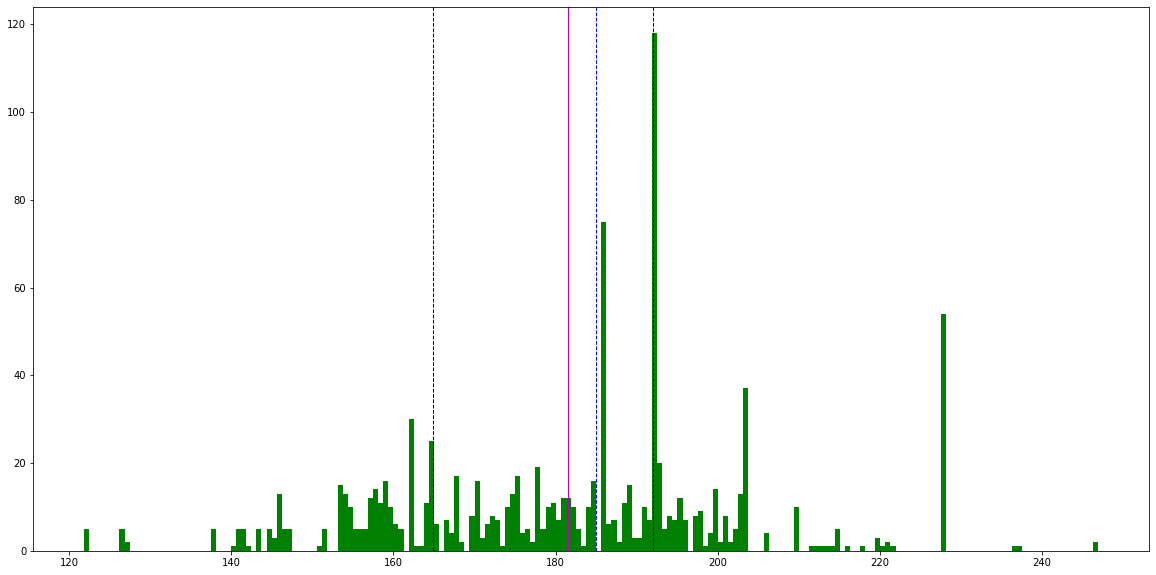

In [21]:
plt.figure(figsize=(20,10))
plt.hist(df['water'], color='g', bins=200)
plt.axvline(df['water'].mean(), color='m', linewidth=1)
plt.axvline(df['water'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['water'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['water'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);

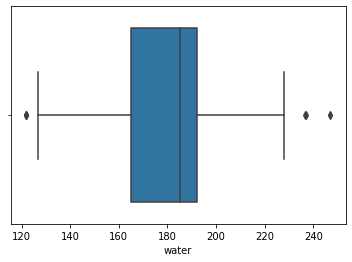

In [22]:
sns.boxplot(df["water"]);

## Name: Superplasticizer

Meaning: amount of superplasticizer in kilograms for the mixture of a cubic meter of concrete

Data Type: float (quantitative)

37% of the mixtures do not use superplasticizer

The superplasticizer is positively skewed

There are no missing values

Theres some outliers above 25

0.0     379
11.6     37
8.0      27
7.0      19
6.0      17
       ... 
2.2       1
11.5      1
6.3       1
10.5      1
9.8       1
Name: superplastic, Length: 111, dtype: int64

0.0     0.367961
11.6    0.035922
8.0     0.026214
7.0     0.018447
6.0     0.016505
9.0     0.015534
8.9     0.015534
7.8     0.015534
9.9     0.015534
10.0    0.014563
Name: superplastic, dtype: float64

superplastic    0
dtype: int64

               count     mean       std  min  25%  50%   75%   max
superplastic  1030.0  6.20466  5.973841  0.0  0.0  6.4  10.2  32.2

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf5de12d0>]]


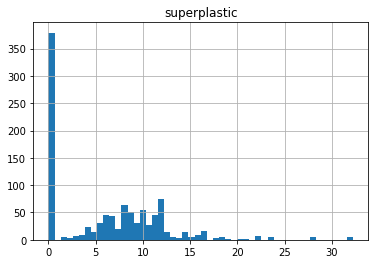

In [23]:
print(df['superplastic'].value_counts())
print()
print(df['superplastic'].value_counts(normalize=True).head(10))
print()
print(df[['superplastic']].isna().sum())
print()
print(df[['superplastic']].describe().T)
print()
print(df[['superplastic']].hist(stacked=False, bins=50))

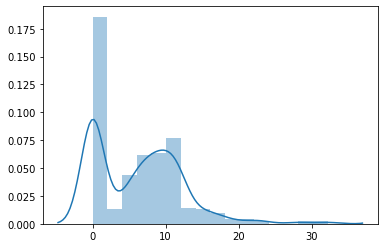

In [24]:
sns.distplot(df[['superplastic']]);

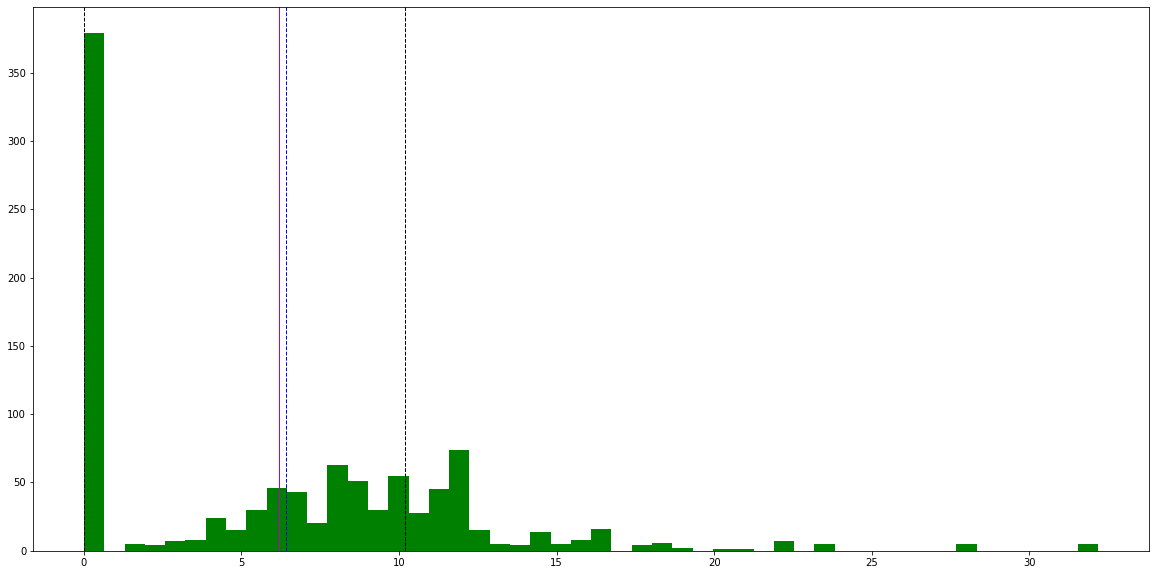

In [25]:
plt.figure(figsize=(20,10))
plt.hist(df['superplastic'], color='g', bins=50)
plt.axvline(df['superplastic'].mean(), color='m', linewidth=1)
plt.axvline(df['superplastic'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['superplastic'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['superplastic'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);

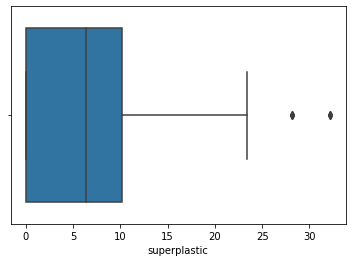

In [26]:
sns.boxplot(df["superplastic"]);

## Name: Coarse Aggregate

Meaning: amount of coarse aggregate in kilograms for the mixture of a cubic meter of concrete

Data Type: float (quantitative)

The coarse aggregate is somewhat symetrical

There are no missing values

Theres some outliers close to the 800 value and to the 1150

932.0     57
852.1     45
944.7     30
968.0     29
1125.0    24
          ..
909.7      1
925.3      1
845.0      1
868.6      1
923.2      1
Name: coarseagg, Length: 284, dtype: int64

932.0     0.055340
852.1     0.043689
944.7     0.029126
968.0     0.028155
1125.0    0.023301
967.0     0.018447
1047.0    0.018447
974.0     0.011650
942.0     0.011650
822.0     0.011650
Name: coarseagg, dtype: float64

coarseagg    0
dtype: int64

            count        mean        std    min    25%    50%     75%     max
coarseagg  1030.0  972.918932  77.753954  801.0  932.0  968.0  1029.4  1145.0

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf720ba10>]]


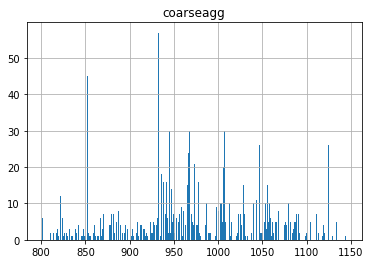

In [27]:
print(df['coarseagg'].value_counts())
print()
print(df['coarseagg'].value_counts(normalize=True).head(10))
print()
print(df[['coarseagg']].isna().sum())
print()
print(df[['coarseagg']].describe().T)
print()
print(df[['coarseagg']].hist(stacked=False, bins=300))

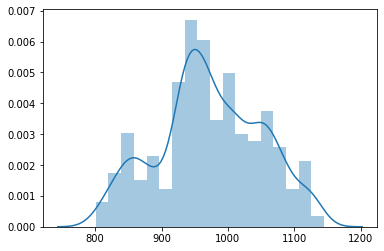

In [28]:
sns.distplot(df[['coarseagg']]);

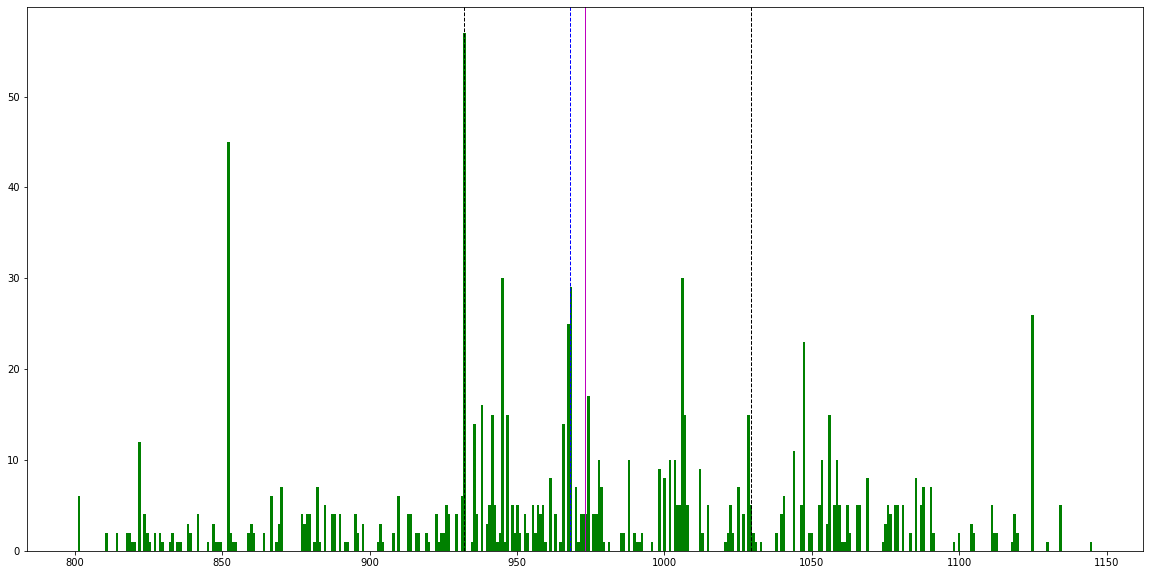

In [29]:
plt.figure(figsize=(20,10))
plt.hist(df['coarseagg'], color='g', bins=400)
plt.axvline(df['coarseagg'].mean(), color='m', linewidth=1)
plt.axvline(df['coarseagg'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['coarseagg'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['coarseagg'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);

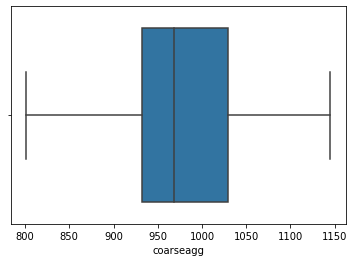

In [30]:
sns.boxplot(df["coarseagg"]);


## Name: Fine Aggregate

Meaning: amount of fine aggregate in kilograms for the mixture of a cubic meter of concrete

Data Type: float (quantitative)

The fine aggregate is somewhat symetrical

There are no missing values

Theres some outliers above the 950 value

594.0    30
755.8    30
670.0    23
613.0    22
801.0    16
         ..
792.5     1
762.9     1
674.8     1
658.0     1
762.2     1
Name: fineagg, Length: 302, dtype: int64

594.0    0.029126
755.8    0.029126
670.0    0.022330
613.0    0.021359
801.0    0.015534
887.1    0.014563
746.6    0.014563
845.0    0.013592
712.0    0.013592
750.0    0.011650
Name: fineagg, dtype: float64

fineagg    0
dtype: int64

          count        mean       std    min     25%    50%    75%    max
fineagg  1030.0  773.580485  80.17598  594.0  730.95  779.5  824.0  992.6

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf61566d0>]]


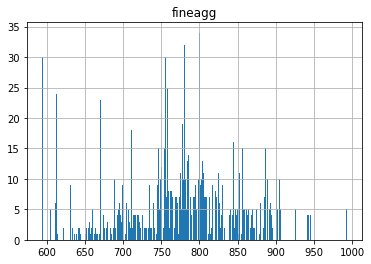

In [31]:
print(df['fineagg'].value_counts())
print()
print(df['fineagg'].value_counts(normalize=True).head(10))
print()
print(df[['fineagg']].isna().sum())
print()
print(df[['fineagg']].describe().T)
print()
print(df[['fineagg']].hist(stacked=False, bins=300))

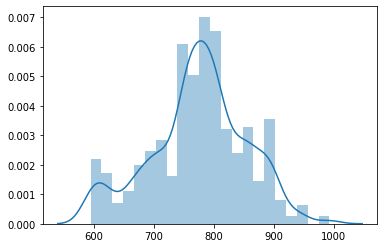

In [32]:
sns.distplot(df[['fineagg']]);

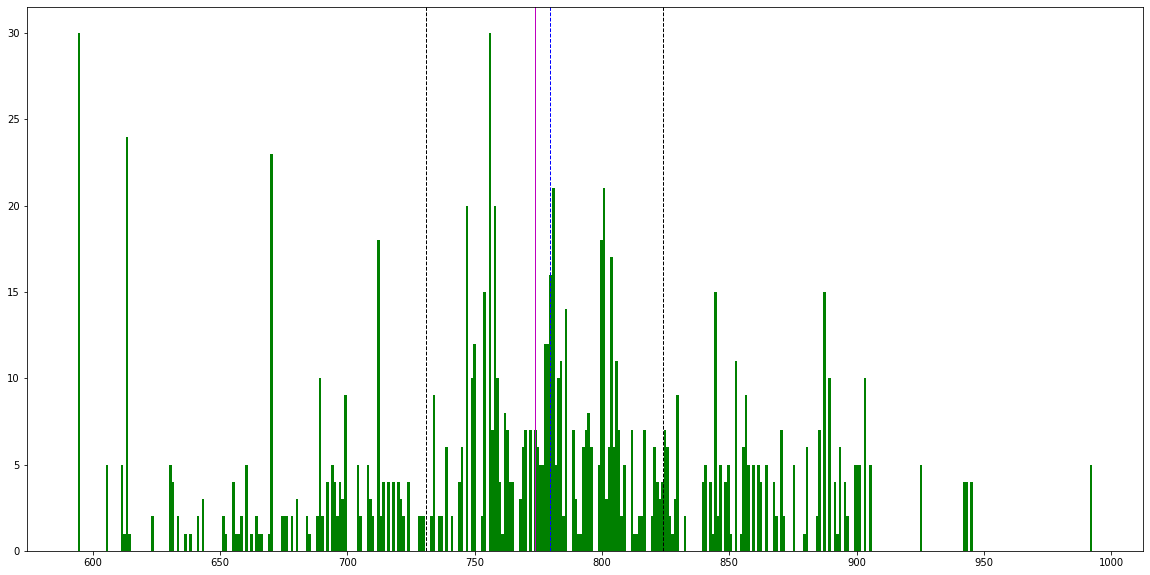

In [33]:
plt.figure(figsize=(20,10))
plt.hist(df['fineagg'], color='g', bins=400)
plt.axvline(df['fineagg'].mean(), color='m', linewidth=1)
plt.axvline(df['fineagg'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['fineagg'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['fineagg'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);


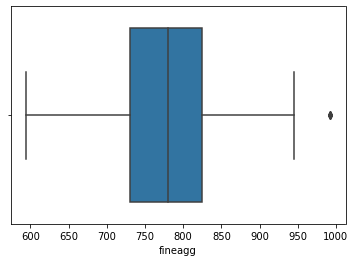

In [34]:
sns.boxplot(df["fineagg"]);

## Name: Age

Meaning: amount of days for the mixture of a cubic meter of concrete that the strength was measured

Data Type: integer (quantitative)

41% of the age was done at 28 days.

66% of the strength tests were done at 28, 3 and 7 days.

The age is positively skewed

There are no missing values

Theres some outliers above 150 days

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

28     0.412621
3      0.130097
7      0.122330
56     0.088350
14     0.060194
90     0.052427
100    0.050485
180    0.025243
91     0.021359
365    0.013592
Name: age, dtype: float64

age    0
dtype: int64

      count       mean        std  min  25%   50%   75%    max
age  1030.0  45.662136  63.169912  1.0  7.0  28.0  56.0  365.0

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf6cf3690>]]


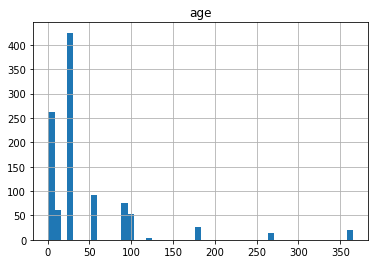

In [35]:
print(df['age'].value_counts())
print()
print(df['age'].value_counts(normalize=True).head(10))
print()
print(df[['age']].isna().sum())
print()
print(df[['age']].describe().T)
print()
print(df[['age']].hist(stacked=False, bins=50))

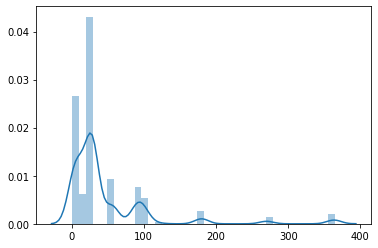

In [36]:
sns.distplot(df[['age']]);

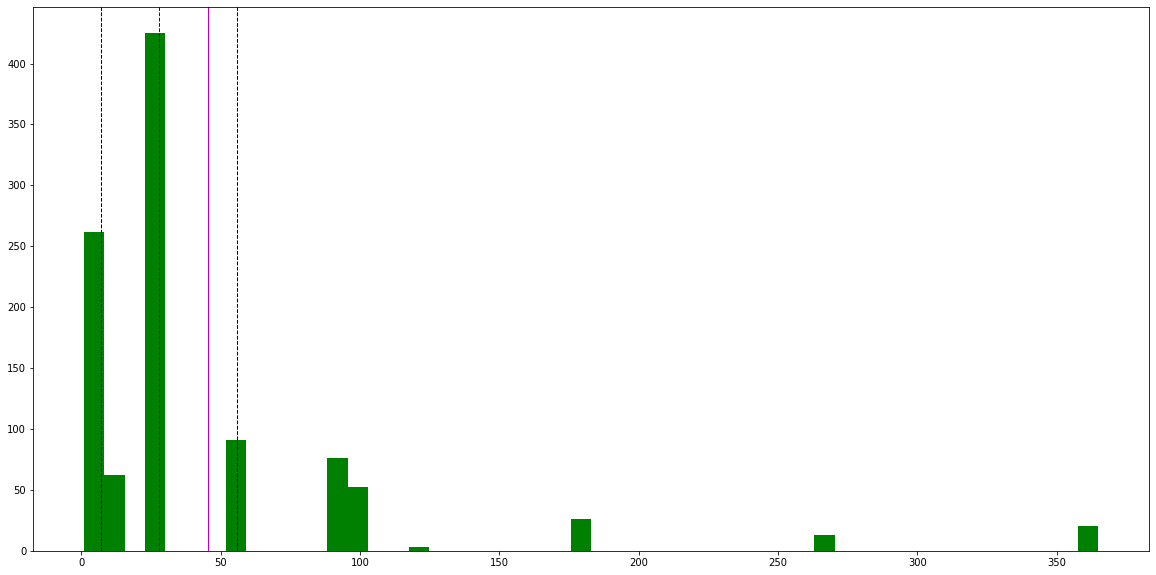

In [37]:
plt.figure(figsize=(20,10))
plt.hist(df['age'], color='g', bins=50)
plt.axvline(df['age'].mean(), color='m', linewidth=1)
plt.axvline(df['age'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['age'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['age'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);

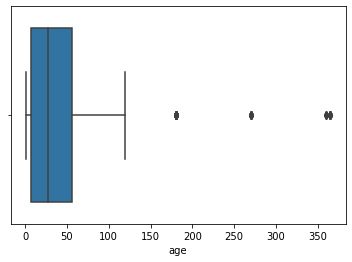

In [38]:
sns.boxplot(df["age"]);

## Name: Concrete compressive strength

Meaning: Concrete compressive strength of a cubic meter of concrete

Data Type: integer (quantitative)

The concrete compressive strength is symetrical

There are no missing values

Theres some outliers above 80

33.40    6
79.30    4
41.05    4
71.30    4
35.30    4
        ..
61.23    1
26.31    1
38.63    1
47.74    1
15.75    1
Name: strength, Length: 845, dtype: int64

33.40    0.005825
79.30    0.003883
41.05    0.003883
71.30    0.003883
35.30    0.003883
23.52    0.003883
31.35    0.003883
77.30    0.003883
37.27    0.002913
55.90    0.002913
Name: strength, dtype: float64

strength    0
dtype: int64

           count       mean        std   min    25%     50%     75%   max
strength  1030.0  35.817961  16.705742  2.33  23.71  34.445  46.135  82.6

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf60567d0>]]


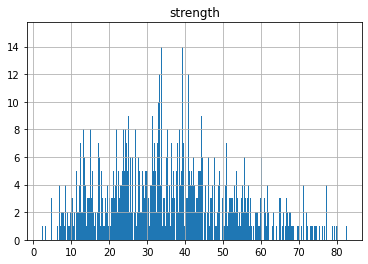

In [39]:
print(df['strength'].value_counts())
print()
print(df['strength'].value_counts(normalize=True).head(10))
print()
print(df[['strength']].isna().sum())
print()
print(df[['strength']].describe().T)
print()
print(df[['strength']].hist(stacked=False, bins=400))

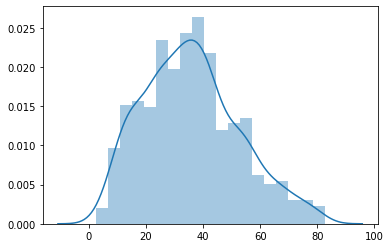

In [40]:
sns.distplot(df[['strength']]);

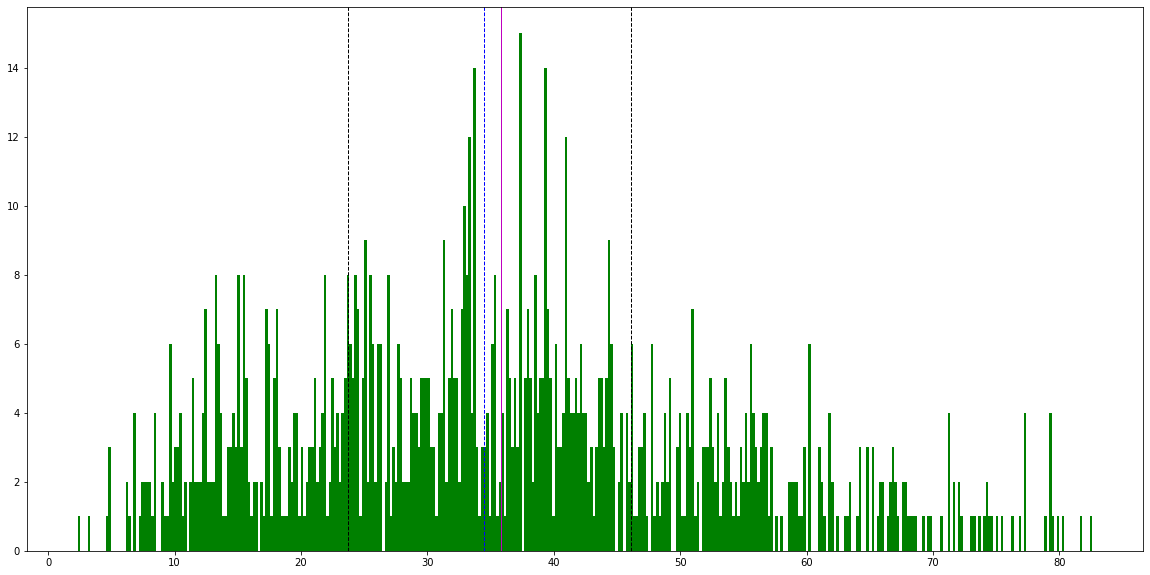

In [41]:
plt.figure(figsize=(20,10))
plt.hist(df['strength'], color='g', bins=400)
plt.axvline(df['strength'].mean(), color='m', linewidth=1)
plt.axvline(df['strength'].median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df['strength'].quantile(0.25), color='black', linestyle='dashed', linewidth=1)
plt.axvline(df['strength'].quantile(0.75), color='black', linestyle='dashed', linewidth=1);

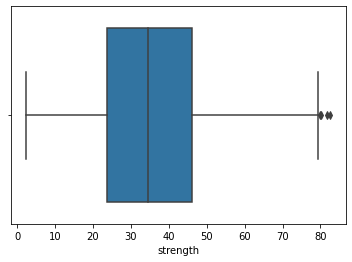

In [42]:
sns.boxplot(df["strength"]);

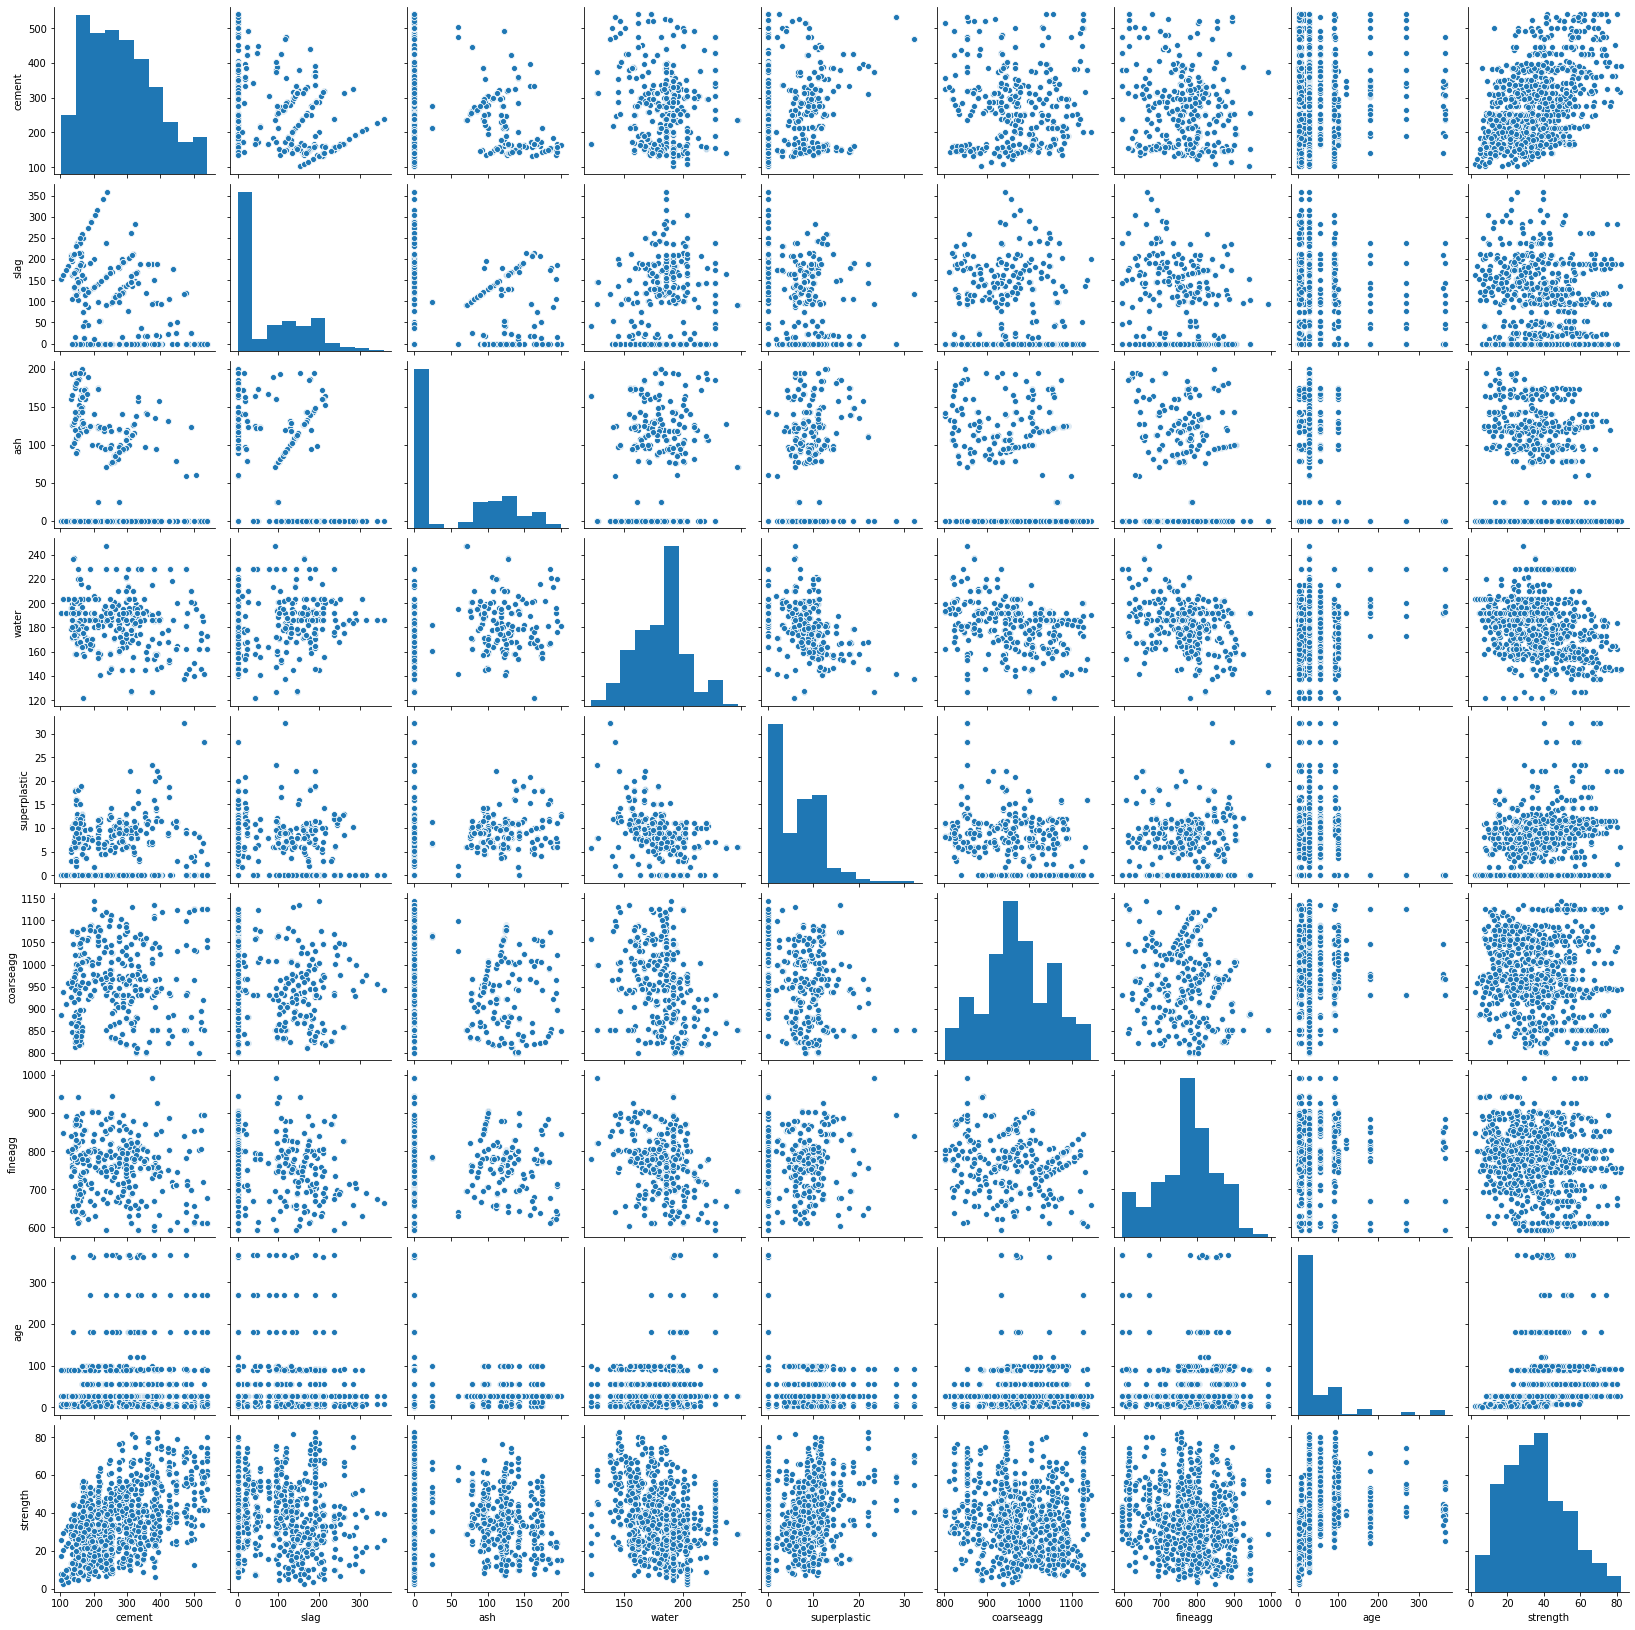

In [83]:
sns.pairplot(data=df);

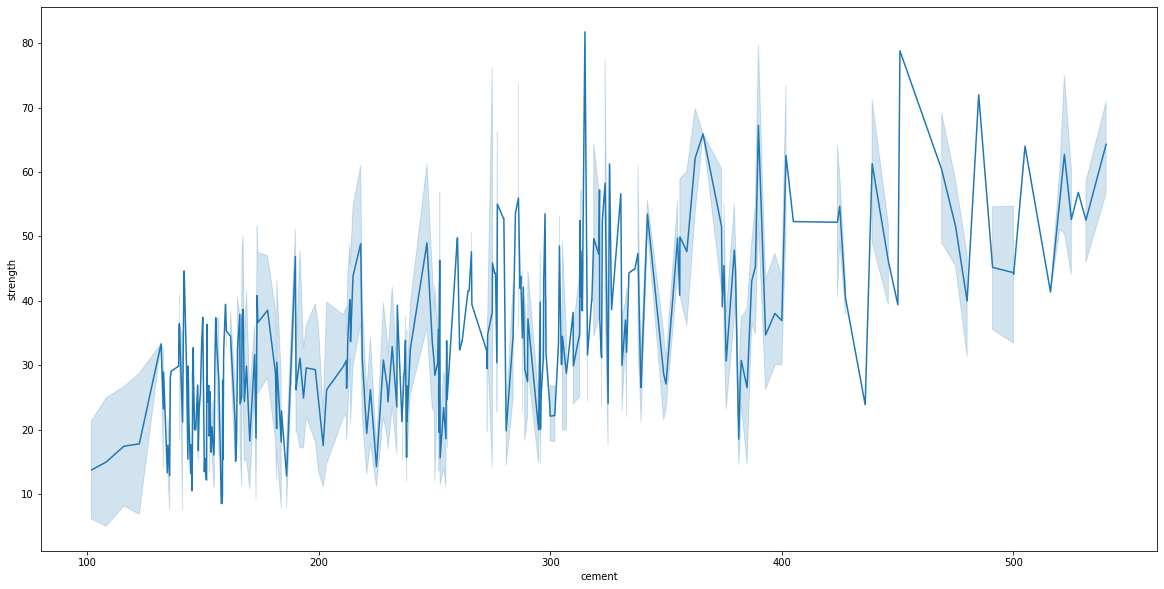

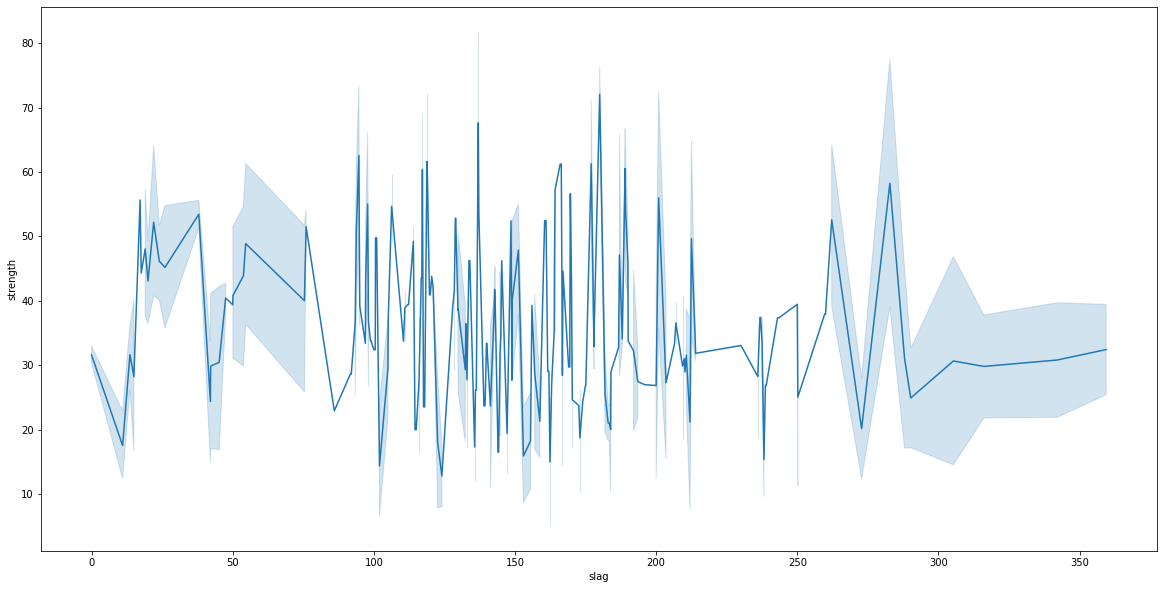

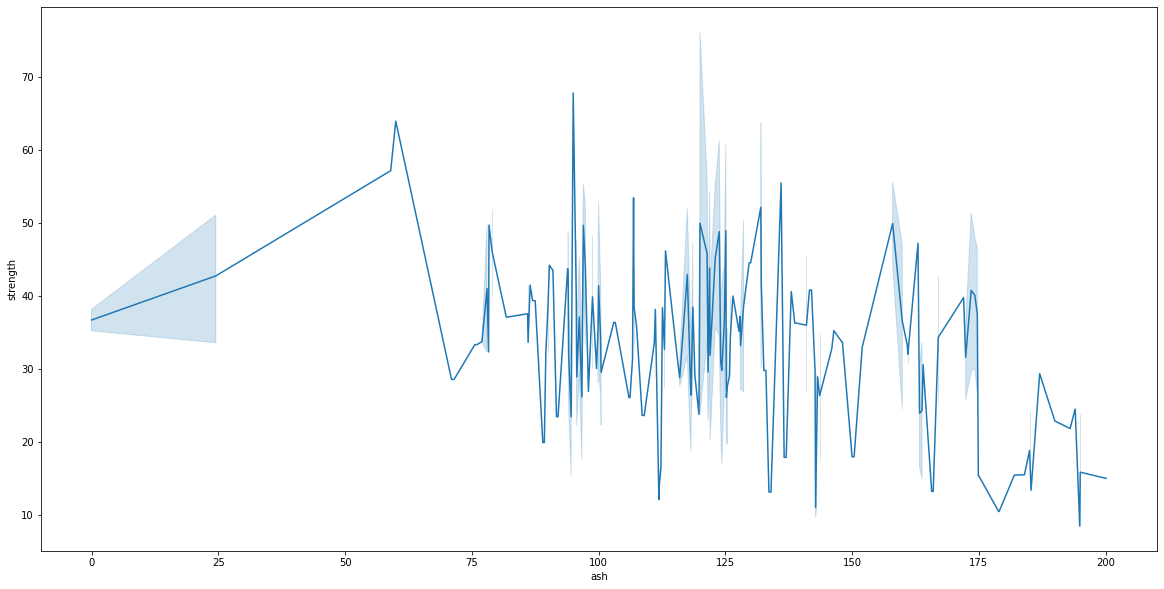

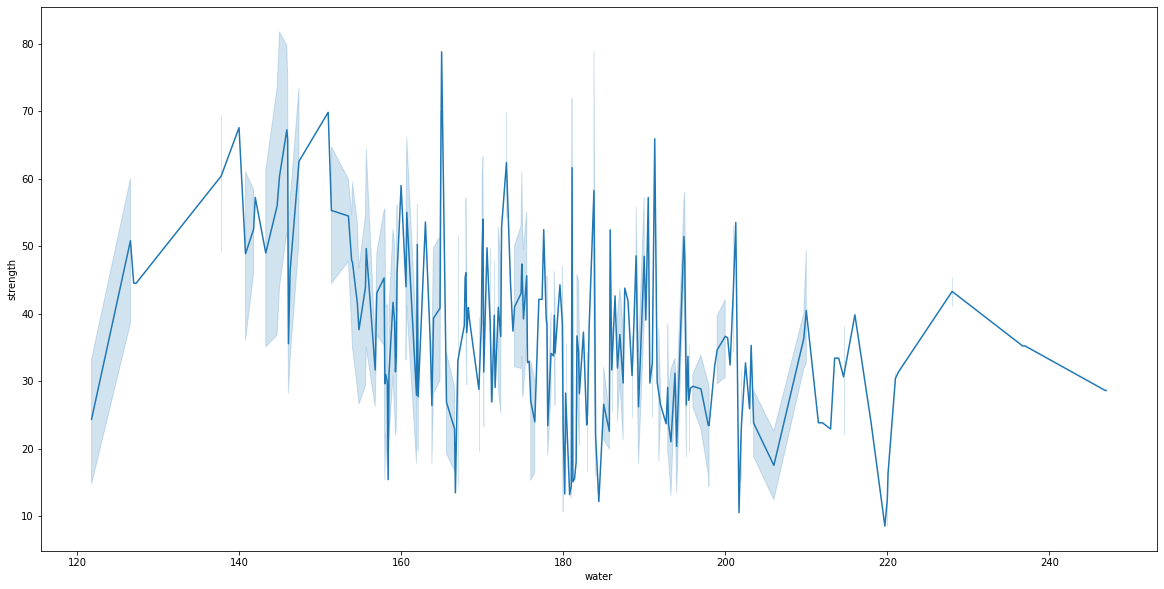

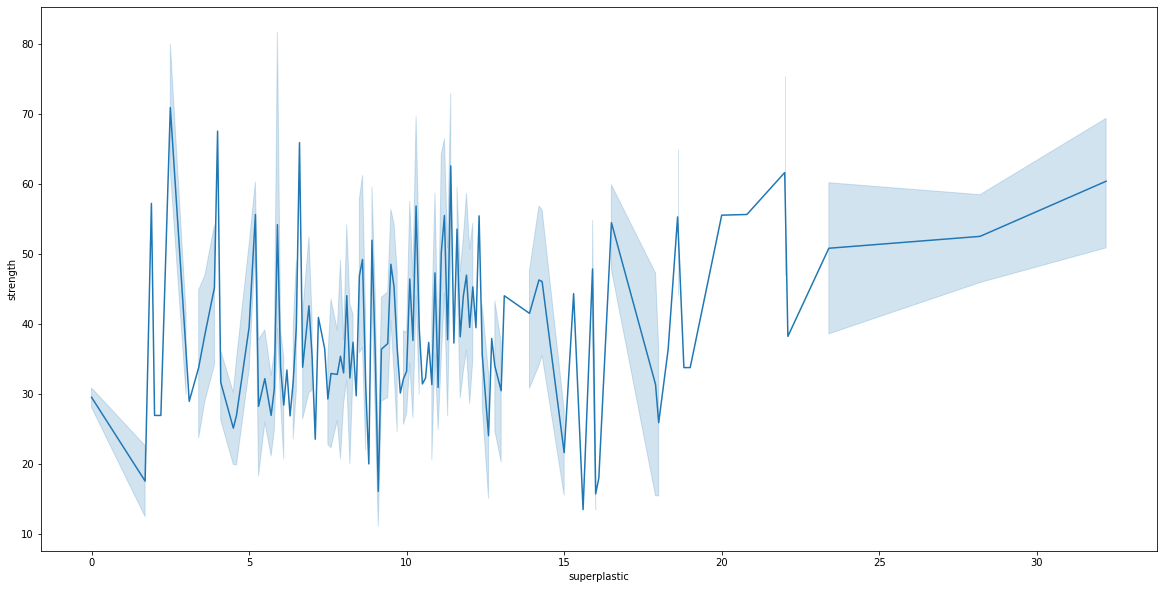

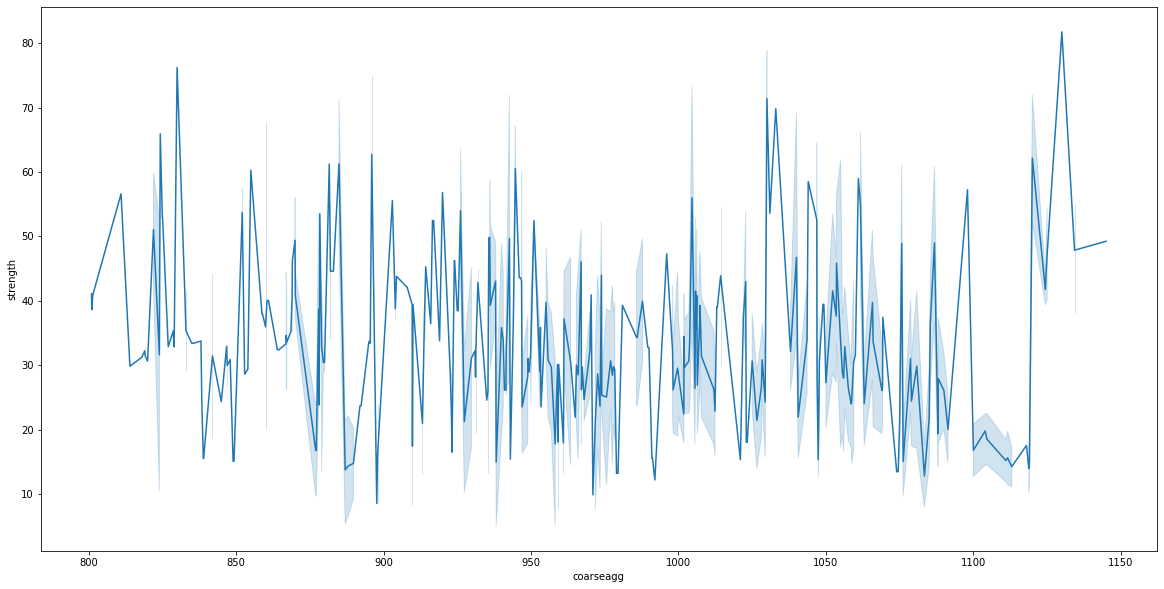

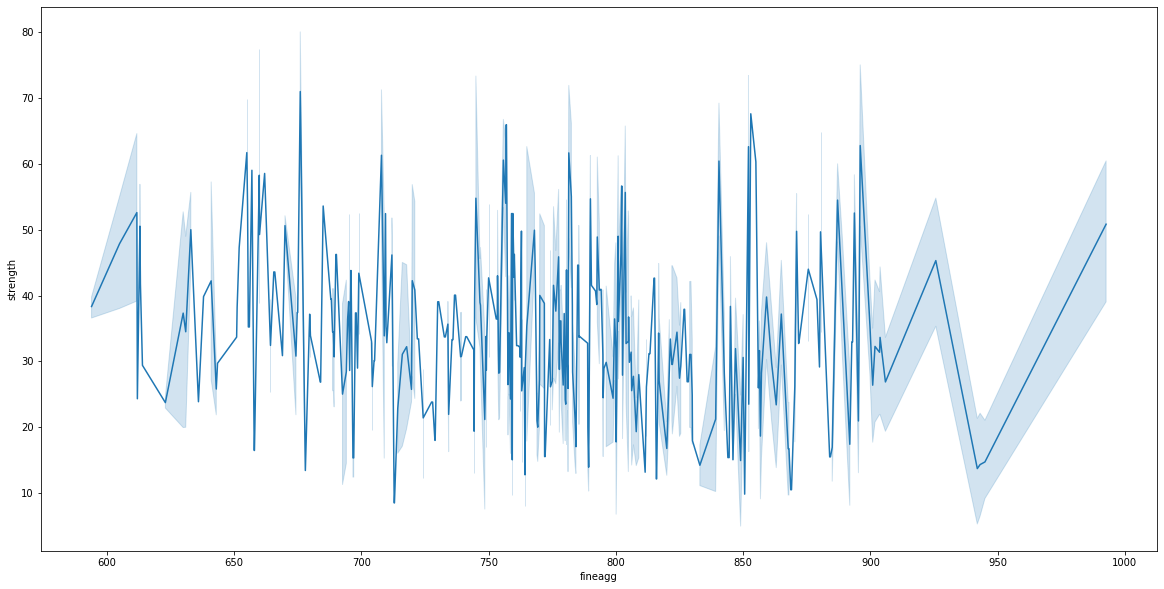

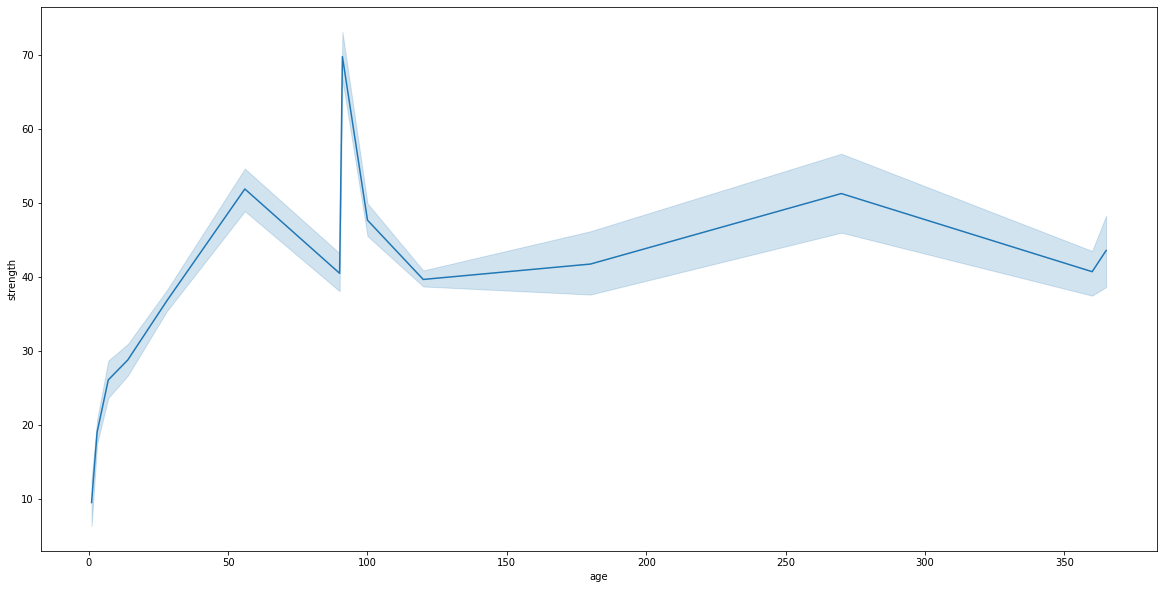

In [84]:
for col in df.columns[:8]:
    plt.figure(figsize=(20,10))
    sns.lineplot(col, "strength", data=df)

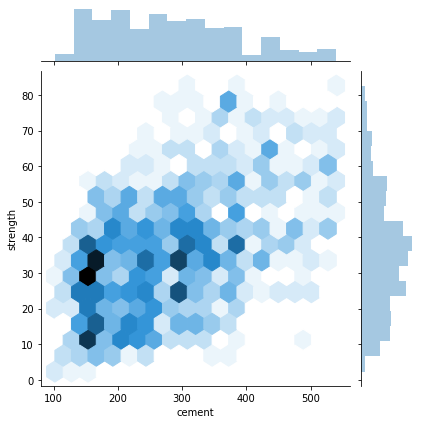

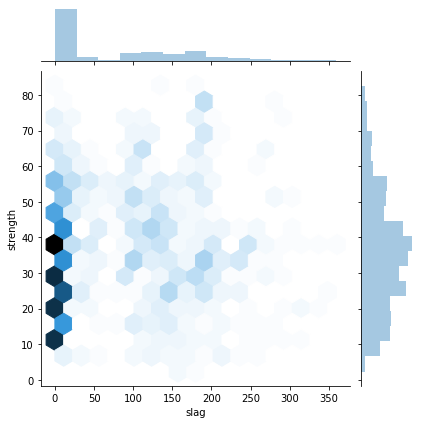

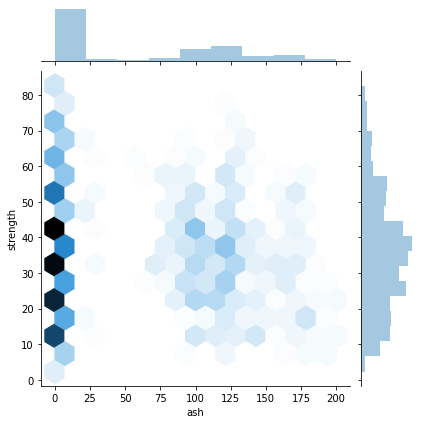

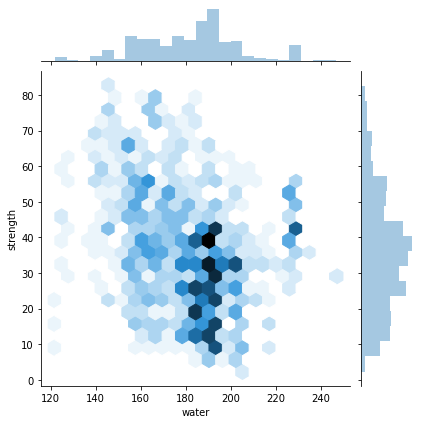

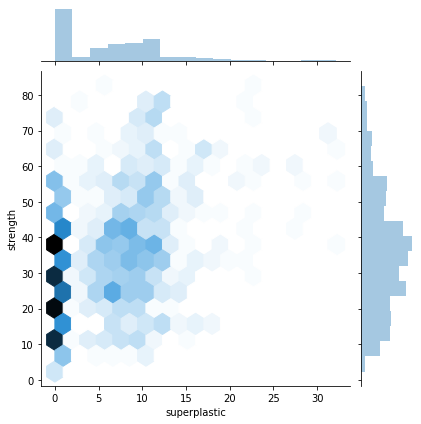

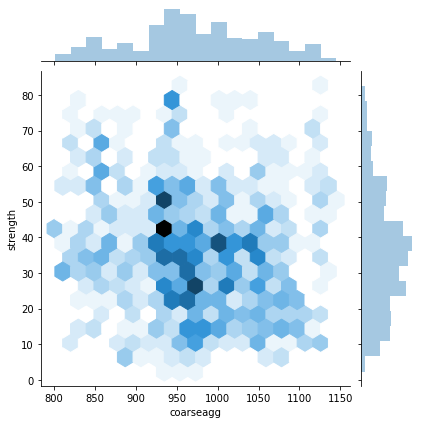

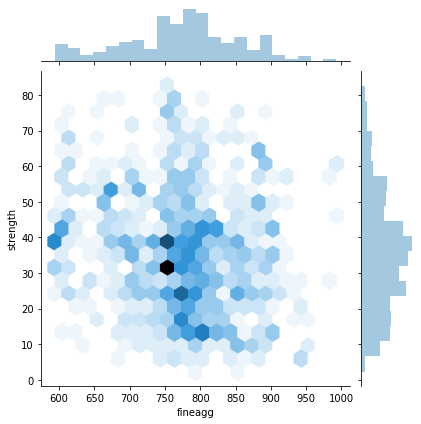

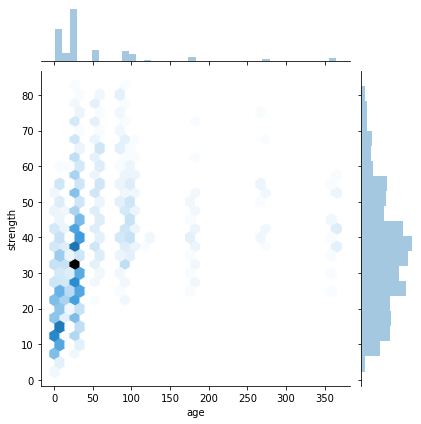

In [85]:
for col in df.columns[:8]:
    sns.jointplot(col, "strength", data=df, kind="hex")

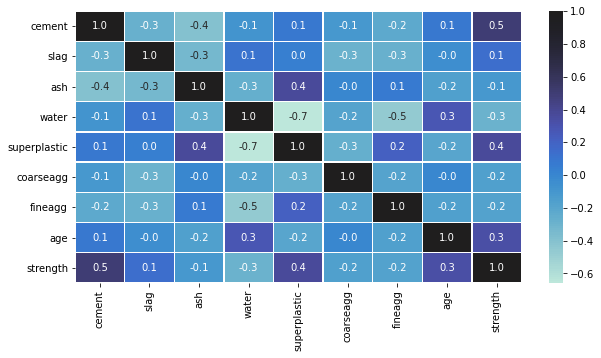

In [46]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

We see a high correlation between strength and (cement, age, and superplastic)

We also see a high correlation between ash and superplastic.

We can see that age has the same correlation with strength and water.

We can see that fineag has low correlation with superplastic

Based on the correlation I would consider removing coarseagg

We can also consider converting slag and ash into 0 or 1 for uses slag/ash and not uses slag/ash

In [47]:
df.drop('coarseagg',axis=1, inplace=True)

In [48]:
X = df.copy()
X = X.drop("strength", axis=1)
y = df.pop("strength")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

I will start with the linear regression, decision tree and random forest generator models

In [49]:
# pipeline = make_pipeline(LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor())
# Kept getting this error
# Not going to use Pipelines
# TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,

In [50]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6348926848963616

In [51]:
dTree = DecisionTreeRegressor(random_state=1)
dTree.fit(X_train, y_train)
dTree.score(X_test, y_test)

0.8434000904751242

In [52]:
rFor = RandomForestRegressor(n_estimators=10, random_state=1)
rFor.fit(X_train, y_train)
rFor.score(X_test, y_test)

0.8955140283679588

In [53]:
num_folds = 35

kfold = KFold(n_splits=num_folds, random_state=1)

results = cross_val_score(lr, X, y, cv=kfold)
print("Linear Regression Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
results = cross_val_score(dTree, X, y, cv=kfold)
print("Decision Tree Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))
results = cross_val_score(rFor, X, y, cv=kfold)
print("Random Forrest Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Linear Regression Accuracy: 57.268% (13.585%)
Decision Tree Accuracy: 86.574% (7.059%)
Random Forrest Accuracy: 90.753% (4.986%)


In [54]:
param_grid = {
    'criterion': ("mse", "friedman_mse", "mae"),
    'splitter': ("best", "random")}
gs = GridSearchCV(dTree,param_grid,cv=kfold)
gs.fit(X_train, y_train)
print(gs.best_params_)
print()
print(gs.cv_results_['mean_test_score'])
print()
print(gs.best_estimator_)

{'criterion': 'mse', 'splitter': 'best'}

[0.79279585 0.75721073 0.78986698 0.7614743  0.77459715 0.77088408]

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')


In [55]:
param_grid = {
    'n_estimators': (90, 100),
    'criterion': ("mse", "mae"),
    'max_features': ("auto", "sqrt", "log2")
}
gs = GridSearchCV(rFor,param_grid,cv=kfold)
gs.fit(X_train, y_train)
print(gs.best_params_)
print()
print(gs.cv_results_['mean_test_score'])
print()
print(gs.best_estimator_)

{'criterion': 'mae', 'max_features': 'auto', 'n_estimators': 100}

[0.88564246 0.88534497 0.87616254 0.87711382 0.87616254 0.87711382
 0.88580381 0.88614976 0.87544193 0.87659326 0.87544193 0.87659326]

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)


In [57]:
dTree = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')
dTree.fit(X_train, y_train)
dTree.score(X_test, y_test)

0.8434000904751242

In [59]:
rFor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
rFor.fit(X_train, y_train)
rFor.score(X_test, y_test)

0.9046215763420669

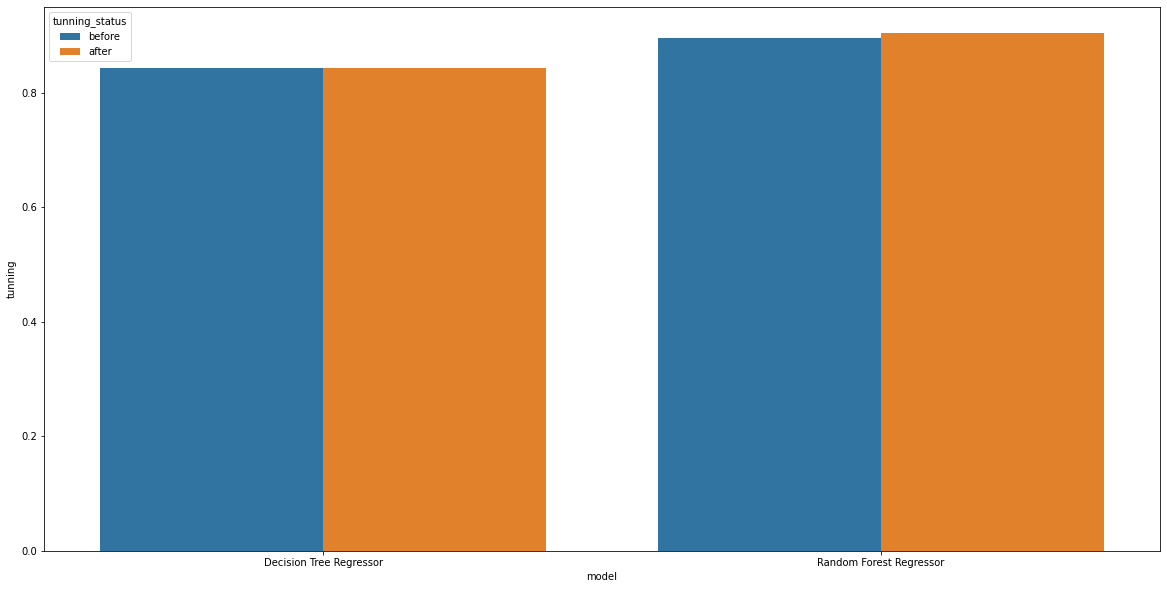

In [79]:
d1 = pd.DataFrame({
    'model': ['Decision Tree Regressor', 'Random Forest Regressor', 'Decision Tree Regressor', 'Random Forest Regressor'], 
    'tunning_status': ['before', 'before', 'after', 'after'],
    'tunning': [0.8434000904751242,0.8955140283679588, 0.8434000904751242,0.9046215763420669]})
plt.figure(figsize=(20,10))
sns.barplot(x='model', y='tunning', data=d1, hue="tunning_status");